In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("heart_disease.csv")

# Display the first few rows of the dataset to understand its structure
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [15]:
# Assuming df is your DataFrame and the columns are ('age', 'sex', 'cp', ...)
columns_to_check = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']

# Concatenate the specified columns into a single Series
combined_series = pd.concat([df[col] for col in columns_to_check])

# Get the unique values
distinct_values = combined_series.unique()

# Print the distinct values
print(distinct_values)


[63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77 'Male' 'Female' 'typical angina' 'atypical angina' 'asymptomatic'
 'non-anginal' 145 135 140 118 110 160 130 155 170 150 125 120 142 100 102
 112 146 138 134 122 136 108 115 104 128 106 156 129 124 126 132 105 152
 148 94 180 178 101 172 80 114 190 113 154 175 133 131 181 188 193 153 179
 143 90 96 163 161 196 107 167 174 158 192 185 144 169 95 92 200 127 121
 166 177 165 117 116 184 97 186 164 123 151 0 137 182 233 203 201 228 276
 211 260 237 226 273 197 240 250 248 265 303 149 234 264 242 302 278 220
 294 394 214 219 271 213 245 209 141 340 318 243 238 222 208 236 275 308
 223 204 269 256 360 239 235 262 257 295 417 212 254 283 244 315 306 342
 267 198 215 304 247 266 252 277 325 246 168 255 195 199 253 321 157 183
 205 210 288 354 221 268 261 216 439 270 310 231 258 227 564 298 263 313
 309 232 207 458 297 224 229 328 347 171 274 365 

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [17]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [19]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


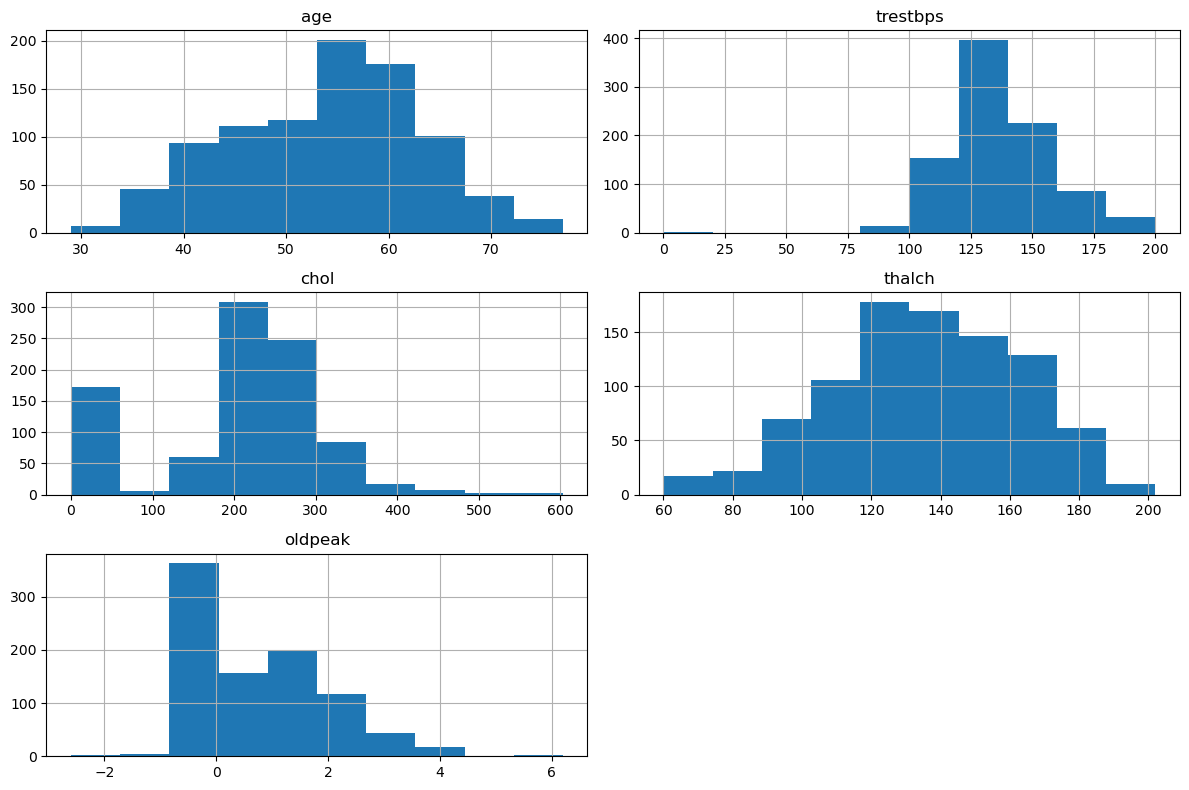

In [43]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numerical_features].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


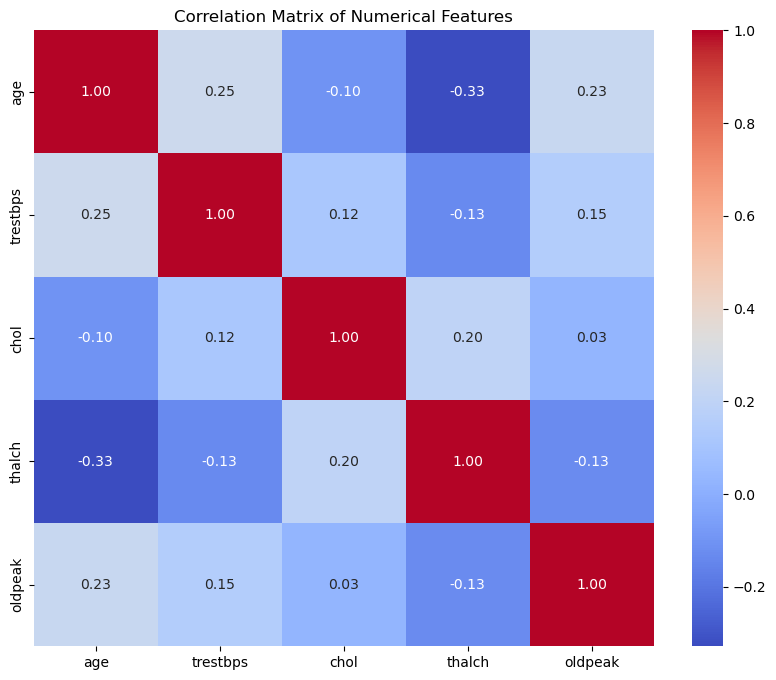

In [46]:
# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features')
plt.show()


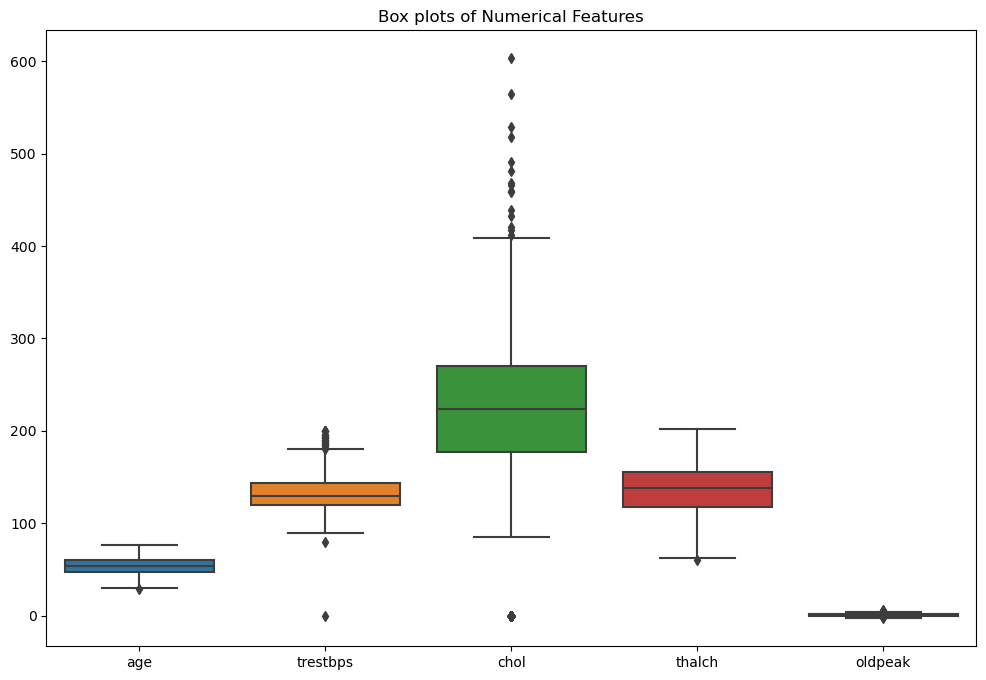

In [47]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features])
plt.title('Box plots of Numerical Features')
plt.show()

In [60]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with the provided structure

# Define numerical columns for outlier treatment
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Function to cap outliers using a specified percentile threshold
def cap_outliers(df, columns, percentile=0.95):
    capped_df = df.copy()
    for col in columns:
        threshold = capped_df[col].quantile(percentile)
        capped_df[col] = np.where(capped_df[col] > threshold, threshold, capped_df[col])
    return capped_df

# Function to remove remaining outliers using a different percentile threshold
def remove_outliers(df, columns, percentile=0.99):
    for col in columns:
        threshold = df[col].quantile(percentile)
        df = df[df[col] <= threshold]
    return df

# Apply outlier treatment
df_capped = cap_outliers(df, numerical_columns)
df_cleaned = remove_outliers(df_capped, numerical_columns)

# Print summary statistics before and after outlier treatment
print("Before outlier treatment:")
print(df[numerical_columns].describe())

print("\nAfter capping outliers:")
print(df_capped[numerical_columns].describe())

print("\nAfter removing remaining outliers:")
print(df_cleaned[numerical_columns].describe())


Before outlier treatment:
              age    trestbps        chol      thalch     oldpeak
count  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253
std      9.158031   20.401608  112.097949   26.804929    1.055826
min     29.000000    0.000000    0.000000   60.000000   -2.600000
25%     47.750000  120.000000  176.750000  118.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.800000
75%     60.000000  144.000000  270.000000  156.000000    1.500000
max     77.000000  200.000000  603.000000  202.000000    6.200000

After capping outliers:
              age    trestbps        chol      thalch     oldpeak
count  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.615639  132.758811  198.299449  135.661894    0.862398
std      8.824571   18.817647  106.159580   26.275556    0.975081
min     29.000000    0.000000    0.000000   60.000000   -2.600000
25%     47.750000  120.00

In [61]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [62]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')  # Use mean imputation for missing values in oldpeak
df['oldpeak'] = imputer.fit_transform(df[['oldpeak']])

In [63]:
# Encoding categorical variables
categorical_cols = ['sex', 'restecg', 'exang', 'slope', 'thal']
encoded_data = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [64]:
# Splitting the dataset into features (X) and target (y)
X = encoded_data.drop('cp', axis=1)  # Exclude 'cp' from features
y = encoded_data['cp']

In [72]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shape of train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (726, 16), y_train shape: (726,)
X_test shape: (182, 16), y_test shape: (182,)


In [66]:
# Optionally, scale numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [68]:
# Train the classifier
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

In [70]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5164835164835165


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Precision: 0.3903
F1-score: 0.1231

Classification Report:
                 precision    recall  f1-score   support

   asymptomatic       0.19      0.13      0.15        87
atypical angina       1.00      0.00      0.00        42
    non-anginal       0.27      0.15      0.19        46
 typical angina       0.02      0.29      0.04         7

       accuracy                           0.11       182
      macro avg       0.37      0.14      0.10       182
   weighted avg       0.39      0.11      0.12       182



In [75]:
# Make predictions on the test set
y_pred = clf.predict(X_test.values)  # Use X_test.values

# Evaluate the model
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'F1-score: {f1:.4f}')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=1))


Precision: 0.3903
F1-score: 0.1231

Classification Report:
                 precision    recall  f1-score   support

   asymptomatic       0.19      0.13      0.15        87
atypical angina       1.00      0.00      0.00        42
    non-anginal       0.27      0.15      0.19        46
 typical angina       0.02      0.29      0.04         7

       accuracy                           0.11       182
      macro avg       0.37      0.14      0.10       182
   weighted avg       0.39      0.11      0.12       182



In [76]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],      # Minimum samples required to split an internal node
    'criterion': ['gini', 'entropy']          # Split criterion: 'gini' for Gini impurity, 'entropy' for information gain
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform hyperparameter tuning on the training set
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f'Best hyperparameters: {grid_search.best_params_}')

# Get the best model
best_clf = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 20}
Accuracy: 0.5549
Precision: 0.5188
Recall: 0.5549
F1-score: 0.5331
ROC-AUC: 0.6590

Classification Report:
                 precision    recall  f1-score   support

   asymptomatic       0.68      0.80      0.74        87
atypical angina       0.41      0.40      0.41        42
    non-anginal       0.39      0.30      0.34        46
 typical angina       0.00      0.00      0.00         7

       accuracy                           0.55       182
      macro avg       0.37      0.38      0.37       182
   weighted avg       0.52      0.55      0.53       182



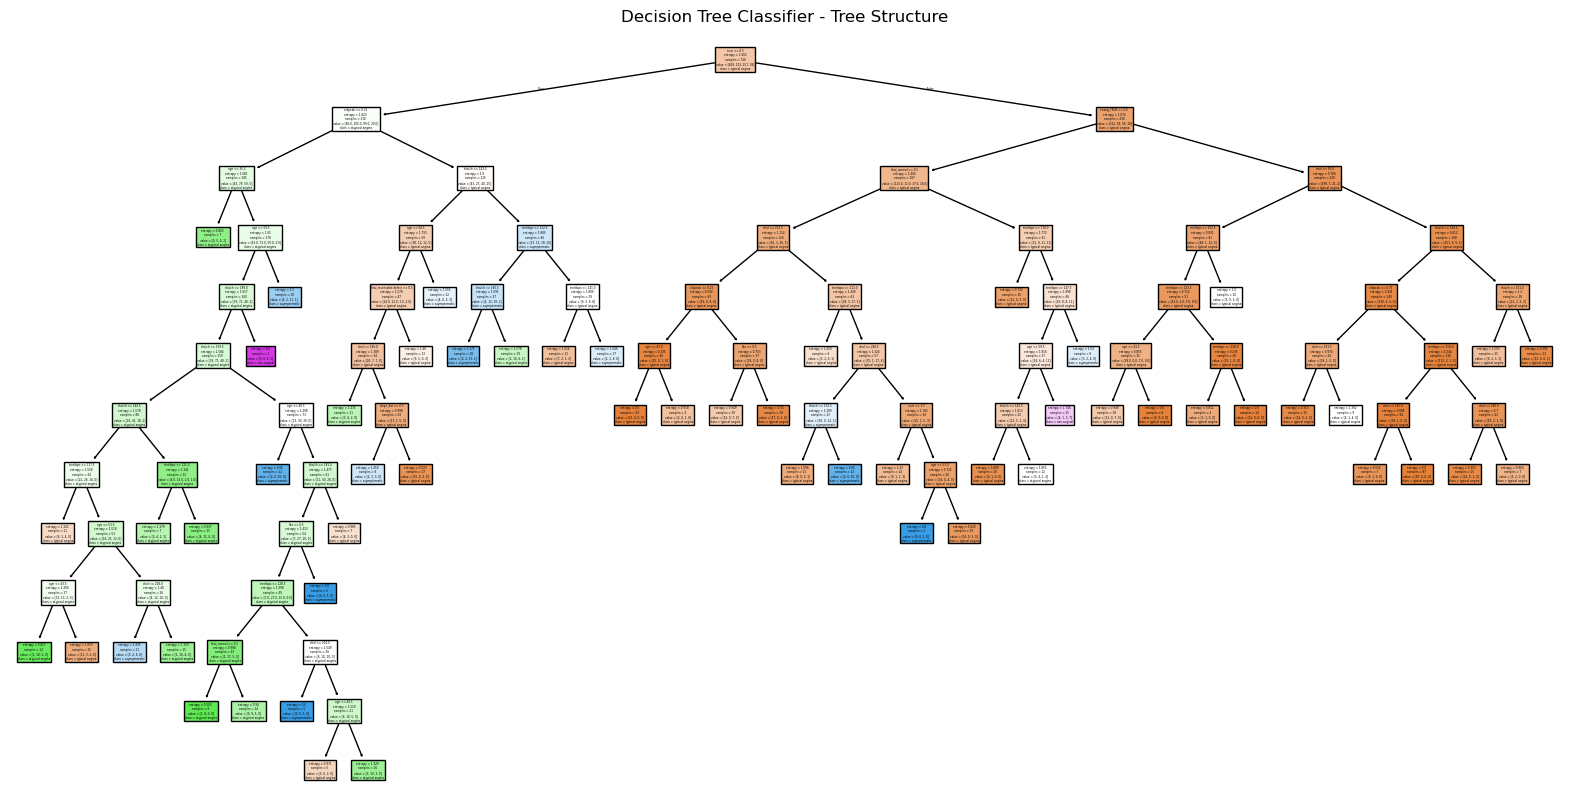

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=df['cp'].unique())
plt.title("Decision Tree Classifier - Tree Structure")
plt.show()


In [ ]:
'''### 1. Common Hyperparameters of Decision Tree Models and Their Effects on Performance

**a. `max_depth`:**
   - **Definition:** Maximum depth of the tree.
   - **Effect:** Limits the number of levels in the tree. A shallow tree (small `max_depth`) may underfit the data, while a deep tree (large `max_depth`) may overfit the data.

**b. `min_samples_split`:**
   - **Definition:** Minimum number of samples required to split an internal node.
   - **Effect:** Controls the number of samples in a node before splitting. Higher values prevent the model from learning overly specific patterns (reduces overfitting).

**c. `min_samples_leaf`:**
   - **Definition:** Minimum number of samples required to be at a leaf node.
   - **Effect:** Ensures that leaf nodes contain at least the specified number of samples, which can help in preventing overfitting.

**d. `max_features`:**
   - **Definition:** Number of features to consider when looking for the best split.
   - **Effect:** Randomly select a subset of features, which can lead to a more robust model by reducing overfitting.

**e. `max_leaf_nodes`:**
   - **Definition:** Maximum number of leaf nodes in the tree.
   - **Effect:** Limits the complexity of the model by restricting the number of leaf nodes, which can help in preventing overfitting.

**f. `min_impurity_decrease`:**
   - **Definition:** A node will be split if the decrease in impurity is greater than or equal to this value.
   - **Effect:** Controls the threshold for splitting nodes, ensuring only nodes that result in a significant decrease in impurity are split.

### 2. Difference Between Label Encoding and One-Hot Encoding

**a. Label Encoding:**
   - **Definition:** Converts categorical data into numerical labels.
   - **Process:** Assigns a unique integer to each category.
   - **Example:** For a feature 'Color' with categories ['Red', 'Green', 'Blue'], label encoding might assign Red=0, Green=1, Blue=2.
   - **Use Case:** Useful for ordinal data where the categories have an intrinsic order.
   - **Limitation:** Can lead to misinterpretation of categorical data as ordinal, causing the model to assume a ranking.

**b. One-Hot Encoding:**
   - **Definition:** Converts categorical data into binary vectors.
   - **Process:** Creates a binary column for each category and assigns a 1 or 0 to indicate the presence of the category.
   - **Example:** For a feature 'Color' with categories ['Red', 'Green', 'Blue'], one-hot encoding will create three columns: [Red, Green, Blue] where a red instance is [1, 0, 0], a green instance is [0, 1, 0], and a blue instance is [0, 0, 1].
   - **Use Case:** Useful for nominal data where categories do not have an intrinsic order.
   - **Limitation:** Increases the dimensionality of the data, which can be problematic with high cardinality features.

Understanding these concepts helps in effectively preprocessing data and tuning models for optimal performance.'''